In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

plt.style.use('seaborn-darkgrid')
plt.rc('figure', figsize=(13,9))
plt.rc('lines', markersize=4)

In [4]:
dataset = pd.read_csv("BBRI Historical Data.csv")
dataset.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 02, 2008",735,735,740,730,44.77M,-0.68%
1,"Jan 03, 2008",720,735,735,710,102.94M,-2.04%
2,"Jan 04, 2008",750,720,755,715,143.67M,4.17%
3,"Jan 07, 2008",745,735,750,730,63.70M,-0.67%
4,"Jan 08, 2008",750,745,755,745,84.23M,0.67%


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      3041 non-null   object
 1   Price     3041 non-null   object
 2   Open      3041 non-null   object
 3   High      3041 non-null   object
 4   Low       3041 non-null   object
 5   Vol.      3041 non-null   object
 6   Change %  3041 non-null   object
dtypes: object(7)
memory usage: 166.4+ KB


In [6]:
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Price'] = dataset['Price'].str.replace(',', '').astype(int)
dataset['Open'] = dataset['Open'].str.replace(',', '').astype(int)
dataset['High'] = dataset['High'].str.replace(',', '').astype(int)
dataset['Low'] = dataset['Low'].str.replace(',', '').astype(int)
dataset['Vol.'] = dataset['Vol.'].str.replace('M', '').astype(float)
dataset['Change %'] = dataset['Change %'].str.replace('%', '').astype(float)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3041 non-null   datetime64[ns]
 1   Price     3041 non-null   int32         
 2   Open      3041 non-null   int32         
 3   High      3041 non-null   int32         
 4   Low       3041 non-null   int32         
 5   Vol.      3041 non-null   float64       
 6   Change %  3041 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int32(4)
memory usage: 118.9 KB


In [8]:
dataset = dataset.set_index('Date')
dataset.head()

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2008-01-02,735,735,740,730,44.77,-0.68
2008-01-03,720,735,735,710,102.94,-2.04
2008-01-04,750,720,755,715,143.67,4.17
2008-01-07,745,735,750,730,63.70,-0.67
2008-01-08,750,745,755,745,84.23,0.67


In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3041 entries, 2008-01-02 to 2020-06-30
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Price     3041 non-null   int32  
 1   Open      3041 non-null   int32  
 2   High      3041 non-null   int32  
 3   Low       3041 non-null   int32  
 4   Vol.      3041 non-null   float64
 5   Change %  3041 non-null   float64
dtypes: float64(2), int32(4)
memory usage: 118.8 KB


In [10]:
dataset.describe()

,Price,Open,High,Low,Vol.,Change %
count,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000,3041.000000
mean,1993.424203,1993.598487,2017.900033,1968.209471,155.594926,0.078188
std,1110.471443,1111.734467,1120.692826,1100.838927,100.360742,2.566339
min,252.000000,245.000000,260.000000,240.000000,0.000000,-13.110000
25%,1085.000000,1090.000000,1120.000000,1070.000000,89.510000,-1.170000
50%,1890.000000,1880.000000,1920.000000,1860.000000,127.680000,0.000000
75%,2625.000000,2625.000000,2645.000000,2600.000000,189.340000,1.280000
max,4740.000000,4730.000000,4760.000000,4690.000000,908.950000,20.490000


In [11]:
dataset = pd.DataFrame(dataset, columns=['Price'])
dataset = dataset.reset_index()

In [12]:
dataset

,Date,Price
0,2008-01-02,735
1,2008-01-03,720
2,2008-01-04,750
3,2008-01-07,745
4,2008-01-08,750
...,...,...
3036,2020-06-24,3120
3037,2020-06-25,3060
3038,2020-06-26,3030
3039,2020-06-29,3040


In [13]:
dataset.isna().values.any()

False

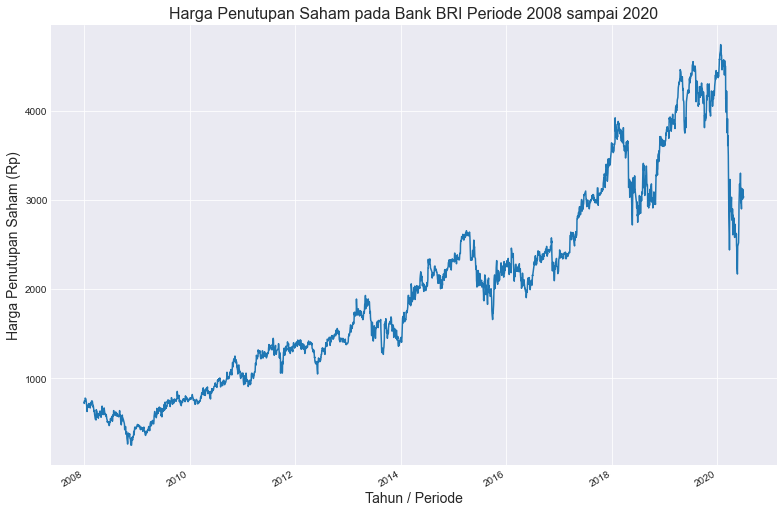

In [14]:
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(dataset['Date'], dataset['Price'])

plt.title('Harga Penutupan Saham pada Bank BRI Periode 2008 sampai 2020', fontsize=16)
plt.xlabel('Tahun / Periode', fontsize=14)
plt.ylabel('Harga Penutupan Saham (Rp)', fontsize=14)\

fig.autofmt_xdate()
plt.show()

In [15]:
train, test = train_test_split(dataset, test_size=0.40, random_state=42)

X_train = np.array(train.index).reshape(-1, 1)
y_train = train['Price']

X_test = np.array(test.index).reshape(-1, 1)
y_test = test['Price']

In [16]:
# train_X, train_y, test_X, test_x = train_test_split(dataset, test_size=0.20, random_state=42)

In [17]:
LR = LinearRegression()

LR.fit(X_train, y_train)

LinearRegression()

In [18]:
LR.score(X_train, y_train)

0.897794591947764

In [19]:
LR.score(X_test, y_test)

0.9078479027437563

Slope :  [1.1855395]
Intercept :  185.49517317021787


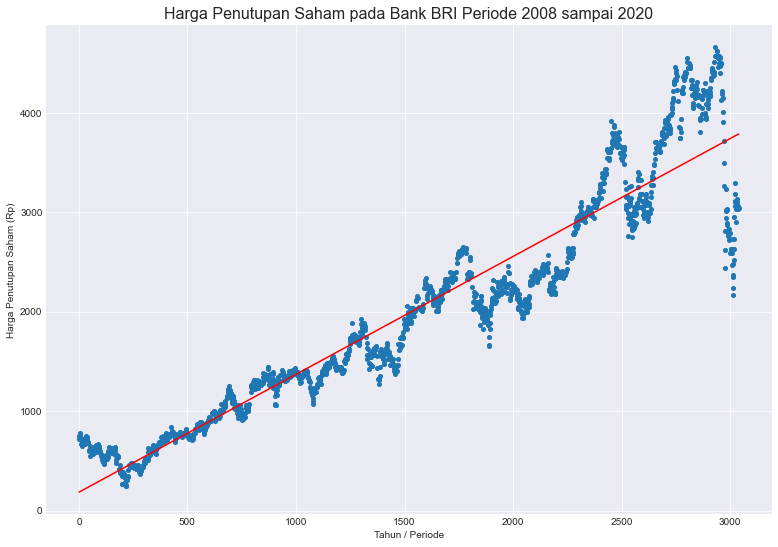

In [20]:
X = np.array(train.index).reshape(-1, 1)
Y = train['Price']

a = LR.coef_
b = LR.intercept_
Y_pred = a*X + b

plt.scatter(X, Y)
plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red')
plt.title('Harga Penutupan Saham pada Bank BRI Periode 2008 sampai 2020', fontsize=16)
plt.xlabel('Tahun / Periode')
plt.ylabel('Harga Penutupan Saham (Rp)')

print('Slope : ', a)
print('Intercept : ', b)

In [21]:
y_pred = LR.predict(X_test)
dataset['Prediction'] = LR.predict(np.array(dataset.index).reshape(-1, 1))

In [22]:
dataset

,Date,Price,Prediction
0,2008-01-02,735,185.495173
1,2008-01-03,720,186.680713
2,2008-01-04,750,187.866252
3,2008-01-07,745,189.051792
4,2008-01-08,750,190.237331
...,...,...,...
3036,2020-06-24,3120,3784.793096
3037,2020-06-25,3060,3785.978636
3038,2020-06-26,3030,3787.164175
3039,2020-06-29,3040,3788.349715


In [23]:
mape = np.mean(np.abs((y_test - y_pred)/y_test))*100

print('MAPE :', mape)

MAPE : 13.321667876005442


In [24]:
print('R2: ', metrics.r2_score(y_test, y_pred))

R2:  0.9078479027437563


In [25]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)

0.908020057928015

In [26]:
def predict(slope, intercept, new_x):
    y = intercept + slope * new_x
    return y

In [27]:
pred = predict(a, b, 3043)
print(pred)

[3793.09187263]
